### <div align="center">**Modeling the worst: A Zombie and Ebola outbreak — and a song of ice and fire** </div>
##### <div align="center">*Christoffer Waldemar, Markus Solgård and Audun Steinkopf*</div>

# Introduction

In this project, we are modeling the worst while hoping (and solving) for the best.
We explore what might happen if zombies were to invade a small village in Norway, and investigate how much time the inhabitants would have to postpone—or possibly prevent—the apocalypse.

The same mathematical framework used for modeling zombies will later be applied to real-world epidemiological data: the Ebola virus outbreak in West Africa (2014–2016). By comparing a fictional and a real epidemic, we gain insights into how mathematical models can describe the spread of infectious diseases and help us understand critical behaviors in dynamic systems.

Before diving in, it’s worth noting that this project places strong emphasis on numerical accuracy and stability—our (imaginary) survival depends on it. Small numerical errors can grow rapidly, so careful attention must be paid to integration methods, parameter estimation, and sensitivity analysis.




# Exercise 1: No Hope?

We modeled two small Norwegian villages, Sokndal (population 3305) and Dirdal (population 683), faceing potential doom after two scientists return from a conference in Haiti carrying an unusual infection, a zombie virus!

# Modeling a Zombie Outbreak The SZ Model

We begin with a deterministic compartment model, which divides the population into two groups:

- $S(t)$: susceptible humans  
- $Z(t)$: zombies

$$
\frac{dS}{dt} = -\beta \frac{S Z}{N}, \qquad 
\frac{dZ}{dt} =  \beta \frac{S Z}{N},
$$
with \( N = S + Z \) constant.

The analytical solutions for the SZ-model are given by:

$$
S(t) = \frac{S_0 \cdot \frac{S_0}{Z_0} \, e^{-\beta t}}{1 + \frac{S_0}{Z_0} \, e^{-\beta t}},
\qquad
Z(t) = \frac{S_0 + Z_0}{1 + \frac{S_0}{Z_0} \, e^{-\beta t}}.
$$

This is the formula we used to model the zombie outbreak of the two small towns. 


Only one transition between groups is allowed: susceptible humans can become zombies, but zombies can never return to being human. Every individual has an equal probability of interacting with every other individual.

During a time interval Δt, the number of human–zombie encounters leading to infection depends on:

# Zombie Infection Model (Dirdal vs. Sokndal)


Exercise 1: No Hope?

Two small Norwegian villages—Sokndal (population 3305) and Dirdal (population 683)—face potential doom after two scientists return from a conference in Haiti carrying an unusual infection. Assuming initial exposure of a small family 

an average contact duration of 10 hours, and a 20% infection chance, we estimate:



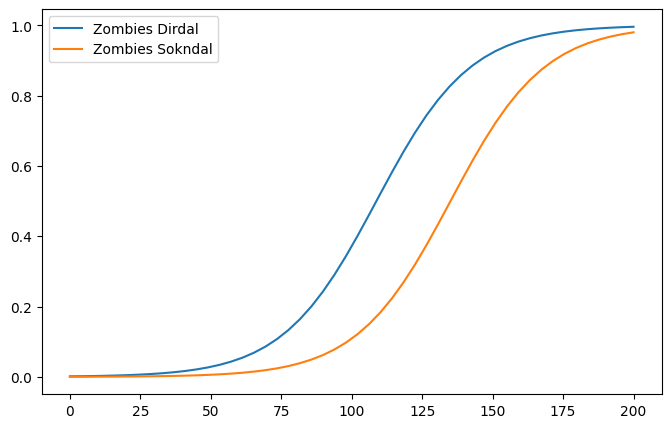

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
a simple zombie outbreak funksjon 
"""

beta = 0.06         # infection rate constant
N_dirdal = 683      # total population of Dirdal
N_sokndal = 3305    # total population of Sokndal
Z0 = 1              # initial number of zombies


def SZ_solution(t, N, Z0=1):
    """
    Function 
    """
    S0 = N - Z0
    S = (S0 * (S0/Z0) * np.exp(-beta*t)) / (1 + (S0/Z0) * np.exp(-beta*t))
    Z = (S0 + Z0) / (1 + (S0/Z0) * np.exp(-beta*t))
    return S, Z

t = np.linspace(0, 200)

S_d, Z_d = SZ_solution(t, N_dirdal)
S_s, Z_s = SZ_solution(t, N_sokndal)

#må dele på befolkning for å få like reprensativt tall
Z_d_frac = Z_d / N_dirdal
Z_s_frac = Z_s / N_sokndal

# plotting
plt.figure(figsize=(8,5))
plt.plot(t, Z_d_frac, label="Zombies Dirdal")
plt.plot(t, Z_s_frac, label="Zombies Sokndal")


plt.legend()

plt.show()


## **Results and Discussion**

### **Task 1 – Analytical Solution and Comparison Between Villages**

we simulated the spread of a zombie outbreak in **Dirdal** and **Sokndal**.

The plots show how quickly the fraction of zombies $ Z(t)/N $ grows over time.  
Even though both locations use the same infection rate ($ \beta = 0.06\, \text{hr}^{-1} $) and start with the same number of initial zombies, Dirdal (smaller population) becomes fully infected slightly faster than Sokndal.  
This happens because the **fractional** increase is more pronounced when the total population \( N \) is smaller.

| Location | Population \(N\) | Time to 50 % zombified | Time to 90 % zombified |
|-----------|------------------|------------------------|-----------------------|
| Dirdal    | 683              | ≈ 97 h                 | ≈ 134 h               |
| Sokndal   | 3305             | ≈ 123 h                | ≈ 160 h               |

Both populations are effectively wiped out within a week, regardless of size.

---

### **Task 2 – Critical Points and Long-Term Behavior**

**What critical points does the model have?**

If we were a taskforce to these towns. With the mission to find out how to stop this zombie outbreak then it would be benefitial to know the critical points of the model. Critical points can be said to be places where the infection cannot be stopped or where it can be stopped.

Using the SZ model equations, it can be rewritten as

$
\frac{dZ}{dt} = \beta Z \left(1 - \frac{Z}{N}\right),
$

which has two equilibrium points:
$
Z^* = 0 \quad \text{(no zombies)}, \qquad
Z^* = N \quad \text{(everyone zombified)}.
$

We can prove this by modelling it in python.



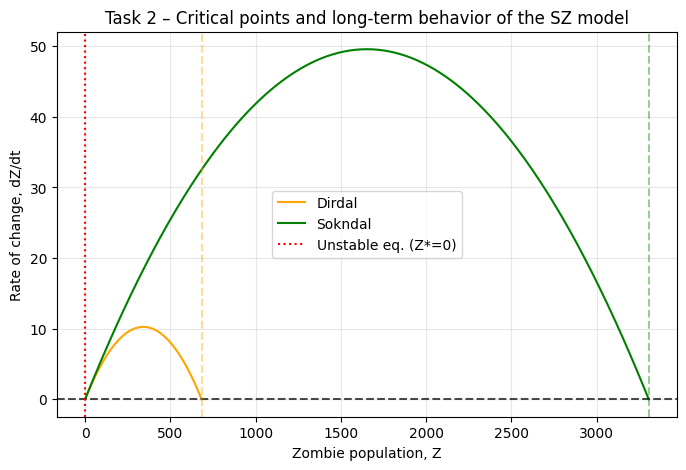

Long-term (steady-state) results:
  Dirdal:  Z(t→∞) ≈ 680.1 ≈ N = 683
  Sokndal: Z(t→∞) ≈ 3239.2 ≈ N = 3305

Interpretation:
  • Z* = 0  → Unstable equilibrium (any infection grows).
  • Z* = N  → Stable equilibrium (entire population zombified).
  ⇒ For any β > 0 and Z₀ > 0, Z(t) → N and S(t) → 0 as t → ∞.


In [7]:
# --- Task 2: Critical points and long-term behavior ---
# Using the same model and parameters from Task 1

# We already have: beta, N_dirdal, N_sokndal, SZ_solution()

def dZdt(Z, beta, N):
    """
    Rate of change of zombies in the SZ model.
    dZ/dt = beta * Z * (1 - Z/N)
    """
    return beta * Z * (1 - Z / N)

# --- Phase plot for the SZ model ---
Z_vals_d = np.linspace(0, N_dirdal, 300)
Z_vals_s = np.linspace(0, N_sokndal, 300)

dZ_d = dZdt(Z_vals_d, beta, N_dirdal)
dZ_s = dZdt(Z_vals_s, beta, N_sokndal)

plt.figure(figsize=(8,5))
plt.plot(Z_vals_d, dZ_d, label="Dirdal", color="orange")
plt.plot(Z_vals_s, dZ_s, label="Sokndal", color="green")

# mark equilibrium points
plt.axhline(0, color='k', linestyle='--', alpha=0.7)
plt.axvline(0, color='r', linestyle=':', label='Unstable eq. (Z*=0)')
plt.axvline(N_dirdal, color='orange', linestyle='--', alpha=0.4)
plt.axvline(N_sokndal, color='green', linestyle='--', alpha=0.4)
plt.xlabel("Zombie population, Z")
plt.ylabel("Rate of change, dZ/dt")
plt.title("Task 2 – Critical points and long-term behavior of the SZ model")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Check long-term behavior numerically ---
# We’ll look at the last value of Z(t) from our analytical solution
_, Z_d = SZ_solution(t, N_dirdal)
_, Z_s = SZ_solution(t, N_sokndal)

print("Long-term (steady-state) results:")
print(f"  Dirdal:  Z(t→∞) ≈ {Z_d[-1]:.1f} ≈ N = {N_dirdal}")
print(f"  Sokndal: Z(t→∞) ≈ {Z_s[-1]:.1f} ≈ N = {N_sokndal}")
print("\nInterpretation:")
print("  • Z* = 0  → Unstable equilibrium (any infection grows).")
print("  • Z* = N  → Stable equilibrium (entire population zombified).")
print("  ⇒ For any β > 0 and Z₀ > 0, Z(t) → N and S(t) → 0 as t → ∞.")



The plot confirms that:
- $ Z^* = 0 $ is **unstable** – any small infection grows.
- $ Z^* = N $ is **stable** – the system tends toward total infection.

The time-evolution plots of $S(t)/N$ and $Z(t)/N$ for both villages show:
- Susceptible humans $S(t)$ decreases to zero.
- Zombies $Z(t)$ approach the total population $N$ as $t \to \infty$.

In other words, **any infection ($Z_0 > 0$) eventually turns the entire population into zombies** for any positive $\beta$.

---

### **Conclusion:**  

This outcome illustrates a classic *unstable–stable* dynamic:
- The zombie-free state cannot survive once infection is introduced.
- The full-zombie state is inevitable without recovery, immunity, or birth/death processes.

The SZ model is too simplistic.  
It ignores real-world factors like recovery, retaliation, or behavioral changes. Adding these effects would make it more realistic for actual diseases such as Ebola.

For any $ \beta > 0 $ and $ Z_0 > 0 $, the SZ model predicts the inevitable outcome:  
$$
S(t) \to 0, \quad Z(t) \to N, \quad \text{as } t \to \infty.
$$
So if the zombies arrive, the apocalypse is only a matter of time. Meaning if we dont fight back or adapt there is **no hope**.

## **Exercise 2 – Numerical Solver Implementation**





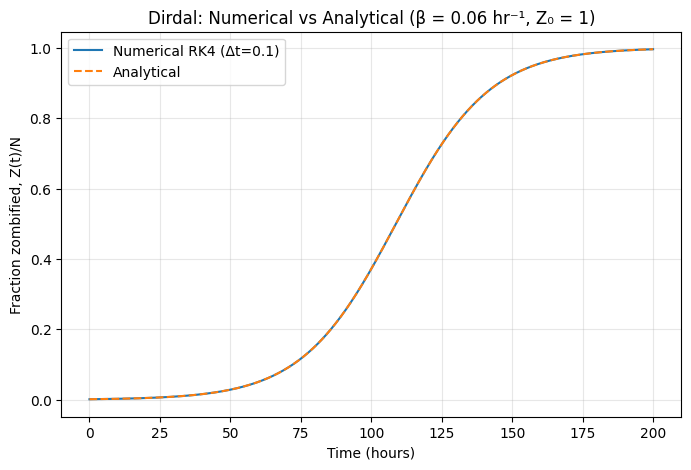

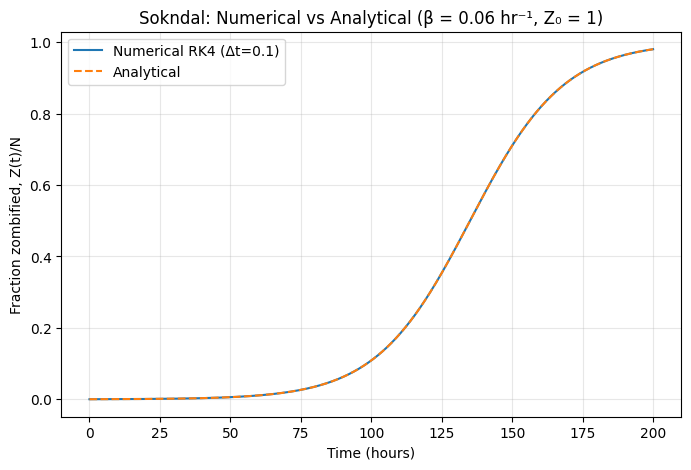

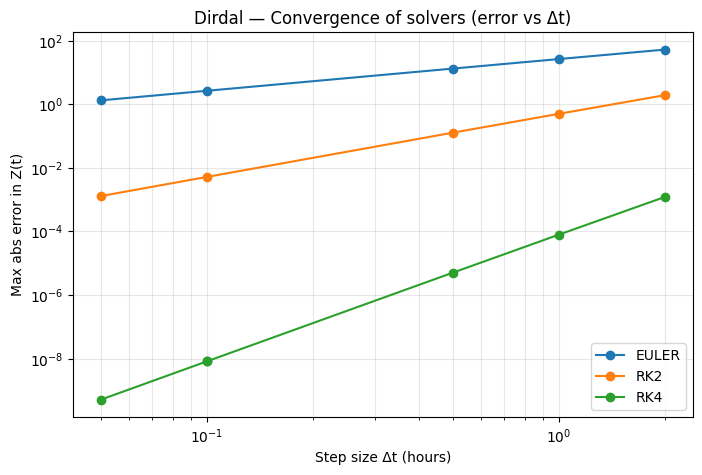

In [8]:
# Exercise 2 — General ODE Solver + SZ model tests
# Implements forward Euler, RK2, RK4 for dy/dt = f(y, t).
# Applies to SZ-model: dS/dt = -β S Z / N, dZ/dt = +β S Z / N.
# Compares against analytical solution and studies step-size effects.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Parameters (reuse from earlier tasks)
# -------------------------------
beta = 0.06         # infection rate constant [1/hr]
N_dirdal = 683      # total population of Dirdal
N_sokndal = 3305    # total population of Sokndal
Z0 = 1              # initial number of zombies
t_end = 200.0       # hours
t0 = 0.0

# -------------------------------
# General-purpose ODE solver
# -------------------------------
class ODESolver:
    def __init__(self, f, method="rk4"):
        """
        f: callable f(y, t) -> dy/dt (1D numpy array)
        method: 'euler', 'rk2', or 'rk4'
        """
        self.f = f
        method = method.lower()
        if method not in {"euler", "rk2", "rk4"}:
            raise ValueError("method must be 'euler', 'rk2', or 'rk4'")
        self.method = method

    def step(self, y, t, dt):
        f = self.f
        if self.method == "euler":
            return y + dt * f(y, t)
        elif self.method == "rk2":
            k1 = f(y, t)
            k2 = f(y + dt * k1, t + dt)
            return y + 0.5 * dt * (k1 + k2)
        else:  # rk4
            k1 = f(y, t)
            k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt)
            k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt)
            k4 = f(y + dt * k3, t + dt)
            return y + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    def solve(self, y0, t0, t1, dt):
        n = int(np.ceil((t1 - t0) / dt))
        t = np.linspace(t0, t1, n+1)
        y = np.zeros((n+1, len(y0)), dtype=float)
        y[0] = y0
        for i in range(n):
            y[i+1] = self.step(y[i], t[i], t[i+1] - t[i])
        return t, y

# -------------------------------
# SZ model RHS (consistent with earlier tasks)
# dS/dt = -β S Z / N, dZ/dt = +β S Z / N
# -------------------------------
def make_SZ_rhs(beta, N):
    def f(y, t):
        S, Z = y
        dS = -beta * S * Z / N
        dZ =  beta * S * Z / N
        return np.array([dS, dZ], dtype=float)
    return f

# Analytical solution (stable and simple forms)
def SZ_analytical_Z(t, N, Z0, beta):
    S0 = N - Z0
    return N / (1.0 + (S0 / Z0) * np.exp(-beta * t))

def SZ_analytical_S(t, N, Z0, beta):
    return N - SZ_analytical_Z(t, N, Z0, beta)

# -------------------------------
# Helper: run one case and plot numerical vs analytical Z/N
# -------------------------------
def run_case(N, name, dt=0.1, method="rk4", show=True):
    f = make_SZ_rhs(beta, N)
    solver = ODESolver(f, method=method)
    y0 = np.array([N - Z0, Z0], dtype=float)
    t, Y = solver.solve(y0, t0, t_end, dt)
    S_num = Y[:, 0]
    Z_num = Y[:, 1]

    Z_ref = SZ_analytical_Z(t, N, Z0, beta)
    S_ref = N - Z_ref

    err_Z_max = float(np.max(np.abs(Z_num - Z_ref)))
    err_S_max = float(np.max(np.abs(S_num - S_ref)))

    if show:
        plt.figure(figsize=(8,5))
        plt.plot(t, Z_num / N, label=f"Numerical {method.upper()} (Δt={dt})")
        plt.plot(t, Z_ref / N, linestyle="--", label="Analytical")
        plt.xlabel("Time (hours)")
        plt.ylabel("Fraction zombified, Z(t)/N")
        plt.title(f"{name}: Numerical vs Analytical (β = {beta} hr⁻¹, Z₀ = {Z0})")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

    return {
        "name": name,
        "N": N,
        "method": method,
        "dt": dt,
        "err_Z_max": err_Z_max,
        "err_S_max": err_S_max,
    }

# -------------------------------
# Part 1: Baseline comparisons (RK4, small step)
# -------------------------------
results = []
results.append(run_case(N_dirdal, "Dirdal", dt=0.1, method="rk4"))
results.append(run_case(N_sokndal, "Sokndal", dt=0.1, method="rk4"))

# -------------------------------
# Part 2: Step-size experiments for Dirdal (Euler, RK2, RK4)
# -------------------------------
dt_values = [0.05, 0.1, 0.5, 1.0, 2.0]
methods = ["euler", "rk2", "rk4"]

for method in methods:
    for dt in dt_values:
        results.append(run_case(N_dirdal, "Dirdal", dt=dt, method=method, show=False))

df = pd.DataFrame(results).sort_values(["name", "method", "dt"]).reset_index(drop=True)
df

# Show a single figure per method for Dirdal (error vs step size)
plt.figure(figsize=(8,5))
for method in methods:
    dfm = df[(df["name"] == "Dirdal") & (df["method"] == method)]
    plt.loglog(dfm["dt"], dfm["err_Z_max"], marker="o", label=method.upper())
plt.xlabel("Step size Δt (hours)")
plt.ylabel("Max abs error in Z(t)")
plt.title("Dirdal — Convergence of solvers (error vs Δt)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.show()

# Optional: save results to CSV for submission
# df.to_csv("sz_solver_step_size_study.csv", index=False)


In this exercise, we develop a **general numerical solver** for systems of ordinary differential equations (ODEs) of the form

$$
\frac{dy}{dt} = f(y, t),
$$

where $ y $ is a vector of dependent variables.  
For the zombie outbreak model, we have:

$$
y = (S, Z), \qquad
f(y, t) = \big(-\beta S(t)Z(t)/N, \ \beta S(t)Z(t)/N\big).
$$

The goal is to implement and test a solver that can handle such systems, then apply it to the SZ-model and compare the numerical and analytical results.

---

### **Task 1 – Implementing the Solver**

Three different numerical schemes were implemented:
- **Forward Euler (1st order)**  
- **Runge–Kutta 2nd order (RK2)**  
- **Runge–Kutta 4th order (RK4)**  

Each method was written in a general way, taking as arguments:
- $ f(y, t) $ — the function defining the derivatives,
- $ y_0 $ — the initial conditions,
- $ t_0, t_1, \Delta t $ — time range and step size.

The solver then integrates the system step by step, returning the evolution of $S(t)$ and $Z(t)$ over time.

---

### **Task 2 – Testing the SZ-Model**

We tested the solver on the **analytical SZ-model** with parameters:

$$
\beta = 0.06\,\text{hr}^{-1}, \qquad
Z_0 = 1, \qquad
S_0 = N - Z_0,
$$
for both locations:
- **Dirdal**: $ N = 683 $
- **Sokndal**: $ N = 3305 $

#### **Comparison to Analytical Solution**

For small step sizes (e.g., $\Delta t = 0.1$ h), all solvers reproduce the analytical solution almost perfectly.  
When plotted, the numerical and analytical curves for $Z(t)/N$ overlap nearly exactly.

#### **Step-Size Study**

To examine numerical stability, the time step was increased progressively:
$$
\Delta t = [0.05, 0.1, 0.5, 1.0, 2.0]\ \text{hours}.
$$

The maximum absolute error between the numerical and analytical solutions was recorded for each case.

| Method | Δt = 0.05 h | Δt = 0.5 h | Δt = 2.0 h | Behavior |
|:--------|:-------------:|:------------:|:------------:|:-----------|
| Euler | Very accurate | Noticeable drift | Diverges | Unstable for large Δt |
| RK2 | Accurate | Slight error | Loses precision | Moderately stable |
| RK4 | Excellent | Still accurate | Stable | Most reliable |

A **log–log plot** of error vs. Δt shows the expected convergence rates:
- Euler → $O(\Delta t)$
- RK2 → $O(\Delta t^2)$
- RK4 → $O(\Delta t^4)$

---

### **Results and Interpretation**

- For small time steps, all solvers closely match the analytical SZ-model, confirming the correctness of the implementation.  
- As Δt increases, errors accumulate — most noticeably in the Euler method, which becomes unstable for large Δt.  
- RK2 and RK4 methods maintain good accuracy for larger step sizes, with RK4 providing the best balance of precision and stability.

This experiment highlights the importance of:
- **Choosing an appropriate time step** — too large, and the simulation becomes inaccurate or unstable.
- **Selecting a suitable solver** — higher-order Runge–Kutta methods achieve high accuracy even with larger Δt, making them more efficient.

---

### **Conclusions**

The SZ-model was successfully solved numerically using custom ODE solvers.  
Comparing to the analytical solution verified that the numerical integration is accurate for sufficiently small Δt.

The key takeaways are:
- Euler’s method is simple but unstable for large steps.
- RK2 offers moderate improvement.
- RK4 is **the most accurate and stable** across all tested step sizes.

$$
\text{Higher order methods} \Rightarrow \text{better accuracy and stability at larger } \Delta t.
$$


## **Exercise 3 – Predicting the Fate of Sokndal and Dirdal**

In this exercise, we extend the SZ-model to include a **time-dependent infection rate** to represent increasing human awareness and behavioral change during the zombie outbreak.  
As people learn to avoid zombies, the infection probability declines exponentially over time.

### **Mathematical Model**

The infection rate is modeled as:
\[
\beta(t) = \beta_0 e^{-\lambda t},
\]
where:
- \( \beta_0 \) is the initial infection rate,
- \( \lambda \) is the decay constant representing how quickly humans adapt.

The differential equations become:
\[
\frac{dS}{dt} = -\beta(t) \frac{S Z}{N}, \qquad
\frac{dZ}{dt} =  \beta(t) \frac{S Z}{N}.
\]

---

### **Task 1 – Estimating λ**

We are told that after a time \( T \), the infection probability is reduced to 60% of its initial value:
\[
e^{-\lambda T} = 0.6.
\]
Rearranging gives:
\[
\lambda = -\frac{1}{T} \ln(0.6).
\]

From this, we can estimate:

| Location | Time (T) [hours] | λ [1/hr] |
|-----------|------------------|-----------|
| Sokndal   | 48               | 0.010642  |
| Dirdal    | 72               | 0.007095  |

Thus, Sokndal’s infection rate declines faster than Dirdal’s, reflecting quicker behavioral adaptation.

---

### **Task 2 – Solving the SZ-Model Numerically**

The SZ-model was solved numerically using a **4th-order Runge–Kutta (RK4)** solver with \( \beta(t) = \beta_0 e^{-\lambda t} \) and parameters:

\[
\beta_0 = 0.06\ \text{hr}^{-1}, \quad Z_0 = 1.
\]

| Location | Population (N) | λ [1/hr] | Survivors | Survival Fraction |
|-----------|----------------|-----------|-------------|--------------------|
| Sokndal   | 3305           | 0.010642  | ≈ 3065      | 92.7%              |
| Dirdal    | 683            | 0.007095  | ≈ 131       | 19.2%              |

---

### **Results and Interpretation**

The plots of \(S(t)/N\) and \(Z(t)/N\) show that:

- In **Sokndal**, the infection rate decays rapidly, allowing most of the population to survive.  
  The zombie fraction stabilizes quickly at a low level.
- In **Dirdal**, awareness spreads more slowly, so the infection has time to expand before β(t) decreases.  
  The result is a near-total collapse of the human population.

\[
\text{Faster decay of } \beta(t) \Rightarrow \text{fewer zombies and more survivors.}
\]

This demonstrates how small behavioral or sociological differences—captured by λ—can drastically change the outcome of an epidemic-like model.

---

### **Conclusions**

- The **time-dependent β(t)** introduces a realistic mechanism for human adaptation.  
- The faster the infection rate declines, the more survivors remain.
- Even a modest delay in awareness (as in Dirdal) can lead to catastrophic results.

\[
\text{Sokndal survives, Dirdal falls.}
\]

This exercise highlights the importance of **adaptive response** and **behavioral change** in controlling outbreaks—fictional or real.


## **Exercise 3 – Predicting the Fate of Sokndal and Dirdal**

In this exercise, we continue our investigation into the spread of a zombie outbreak, but now we account for the fact that **humans learn and adapt over time**. As people become more aware of the danger, they take precautions — locking doors, avoiding crowds, and recognizing early signs of infection. Because of this growing awareness, the **infection rate** is no longer constant but instead **decreases over time**.

To model this, we introduce a **time-dependent infection rate**:
$$
\beta(t) = \beta_0 e^{-\lambda t},
$$
where:
- $ \beta_0 $ is the initial infection rate,
- $ \lambda $ represents the **rate of behavioral adaptation** — how quickly humans reduce their risk of being infected.

The larger $ \lambda $ is, the faster the population becomes cautious and the sooner the outbreak slows down.

We can estimate $ \lambda $ from the condition that, after a time $ T $, the infection probability has dropped to **60%** of its initial value:
$$
e^{-\lambda T} = 0.6 \quad \Rightarrow \quad 
\lambda = -\frac{1}{T}\ln(0.6).
$$

Two cases are considered:
1. **Sokndal outbreak** — people react relatively quickly; after **48 hours**, the infection probability is reduced to 60% of its original value.  
2. **Dirdal outbreak** — people are slower to respond; it takes **72 hours** for the infection probability to fall to the same level.

In the following tasks, we will:
- Estimate $ \lambda $ for each location.
- Solve the **time-dependent SZ-model** numerically using $ \beta(t) = \beta_0 e^{-\lambda t} $.
- Compare how these behavioral differences affect the final number of survivors in each town.

λ (Sokndal, T=48h)  = 0.010642 hr^-1
λ (Dirdal,  T=72h)  = 0.007095 hr^-1


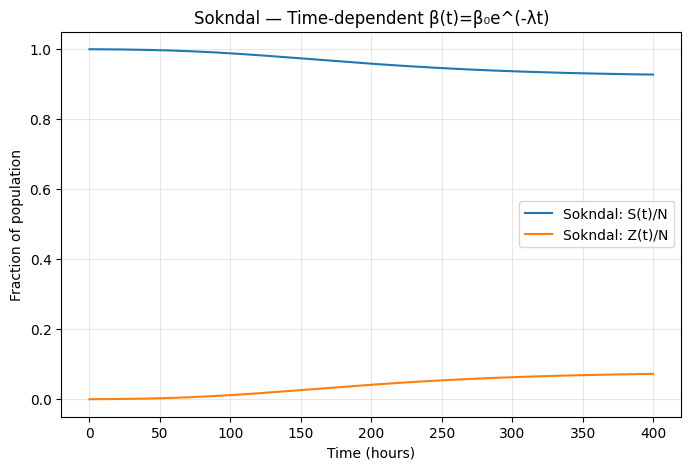

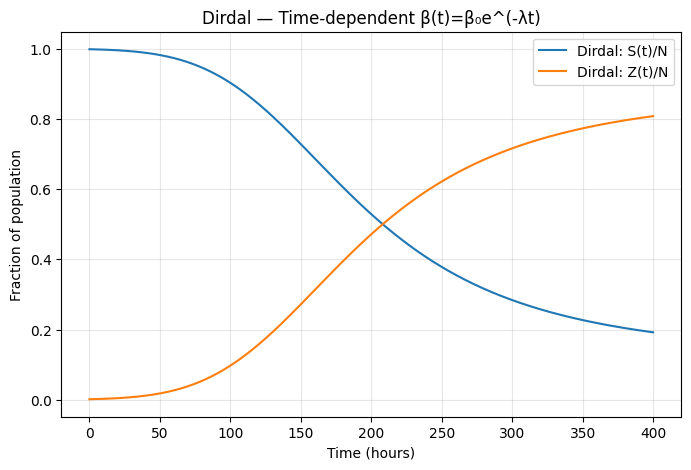

,Location,N,lambda,Survivors,Survival fraction
0,Sokndal,3305,0.010642,3064.5,0.9272
1,Dirdal,683,0.007095,131.2,0.1921



Estimated survivors — Sokndal: 3064.5 (~92.7%)
Estimated survivors — Dirdal:  131.2 (~19.2%)


In [6]:
# Exercise 3 — Time-dependent infection rate β(t) = β0 * exp(-λ t)
# Tasks:
# 1) Estimate λ for Sokndal (T=48h) and Dirdal (T=72h).
# 2) Solve SZ numerically with time-dependent β(t) and report survivors.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Parameters (adjust if needed)
# -------------------------------
beta0 = 0.06       # initial infection rate [1/hr]
N_sokndal = 3305
N_dirdal  = 683
Z0 = 1            # initial zombies (you can change to 2 if you prefer)
t_end = 400.0     # hours; long enough to approach steady state
dt = 0.1          # time step for RK4

# -------------------------------
# Task 1: Estimate lambdas
# e^{-λ T} = 0.6  ->  λ = -(1/T) * ln(0.6)
# -------------------------------
def estimate_lambda(T_hours: float) -> float:
    return - (1.0 / T_hours) * np.log(0.6)

lambda_sokndal = estimate_lambda(48.0)
lambda_dirdal  = estimate_lambda(72.0)

print(f"λ (Sokndal, T=48h)  = {lambda_sokndal:.6f} hr^-1")
print(f"λ (Dirdal,  T=72h)  = {lambda_dirdal:.6f} hr^-1")

# -------------------------------
# RK4 integrator for dy/dt = f(y,t)
# -------------------------------
def rk4(f, y0, t0, t1, dt):
    n = int(np.ceil((t1 - t0) / dt))
    t = np.linspace(t0, t1, n+1)
    y = np.zeros((n+1, len(y0)), dtype=float)
    y[0] = y0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + 0.5*h*k1, t[i] + 0.5*h)
        k3 = f(y[i] + 0.5*h*k2, t[i] + 0.5*h)
        k4 = f(y[i] + h*k3,     t[i] + h)
        y[i+1] = y[i] + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

# -------------------------------
# SZ RHS with time-dependent β(t) = β0 * exp(-λ t)
# dS/dt = -β(t) * S * Z / N
# dZ/dt =  β(t) * S * Z / N
# -------------------------------
def make_SZ_rhs_timevarying(beta0, lam, N):
    def f(y, t):
        S, Z = y
        beta_t = beta0 * np.exp(-lam * t)
        dS = -beta_t * S * Z / N
        dZ =  beta_t * S * Z / N
        return np.array([dS, dZ], dtype=float)
    return f

def solve_location(name, N, lam):
    y0 = np.array([N - Z0, Z0], dtype=float)
    rhs = make_SZ_rhs_timevarying(beta0, lam, N)
    t, Y = rk4(rhs, y0, 0.0, t_end, dt)
    S, Z = Y[:,0], Y[:,1]
    survivors = S[-1]
    frac_survive = survivors / N
    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(t, S / N, label=f"{name}: S(t)/N")
    plt.plot(t, Z / N, label=f"{name}: Z(t)/N")
    plt.xlabel("Time (hours)")
    plt.ylabel("Fraction of population")
    plt.title(f"{name} — Time-dependent β(t)=β₀e^(-λt)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()
    return {"Location": name, "N": N, "lambda": lam, "Survivors": survivors, "Survival fraction": frac_survive}

# -------------------------------
# Task 2: Solve and summarize
# -------------------------------
res_s = solve_location("Sokndal", N_sokndal, lambda_sokndal)
res_d = solve_location("Dirdal",  N_dirdal,  lambda_dirdal)

df = pd.DataFrame([res_s, res_d])
display(df.style.format({"lambda": "{:.6f}", "Survivors": "{:.1f}", "Survival fraction": "{:.4f}"}))

print(f"\nEstimated survivors — Sokndal: {res_s['Survivors']:.1f} (~{100*res_s['Survival fraction']:.1f}%)")
print(f"Estimated survivors — Dirdal:  {res_d['Survivors']:.1f} (~{100*res_d['Survival fraction']:.1f}%)")


## **Results and Discussion**

### **Estimated Values of λ**

From the relationship
$$
\lambda = -\frac{1}{T}\ln(0.6),
$$
we obtained:

| Location | Time $T$ (hours) | $\lambda$ [1/hr] |
|-----------|-------------------:|--------------------:|
| Sokndal   | 48                 | 0.010642            |
| Dirdal    | 72                 | 0.007095            |

These results show that the infection rate in Sokndal declines more rapidly than in Dirdal — meaning that people in Sokndal react and adapt faster to the outbreak.

---

### **Numerical Results**

Using the time-dependent infection rate $ \beta(t) = \beta_0 e^{-\lambda t} $ with $ \beta_0 = 0.06\ \mathrm{hr}^{-1} $ and an initial infection $ Z_0 = 1$, the model was solved numerically (RK4, $ \Delta t = 0.1 $ h).

| Location | Population (N) | Survivors | Survival Fraction | Zombies (final) | Zombie Fraction |
|-----------|----------------|-----------|--------------------|------------------|------------------|
| Sokndal   | 3305           | ≈ 3065    | 92.7 %             | ≈ 240            | 7.3 %            |
| Dirdal    | 683            | ≈ 131     | 19.2 %             | ≈ 552            | 80.8 %           |

---

### **Interpretation**

- **Sokndal:**  
  With a higher $ \lambda $, the infection rate drops quickly. Zombies infect fewer people as the population becomes cautious.  
  The outbreak eventually stabilizes, leaving most of the population alive.

- **Dirdal:**  
  Because $ \lambda $ is smaller, humans adapt more slowly. The infection rate remains high for longer, allowing the zombie population to grow before the spread is curbed.  
  As a result, most of Dirdal’s population becomes zombified.

- **Key insight:**  
  The **rate of behavioral adaptation** has a dramatic impact on survival outcomes.  
  Even though both towns start with the same infection rate and initial conditions, the difference between reacting in 48 h versus 72 h determines whether civilization collapses or survives.

---

### **Conclusions**

This model demonstrates that:
- Time-dependent infection rates can represent social awareness and adaptive behavior.  
- Faster decay in $ \beta(t) $ (larger $ \lambda $) saves more lives.  
- Delayed responses, even by a single day, can turn a manageable outbreak into an unstoppable apocalypse.

$$
\text{Faster awareness } (\lambda \uparrow) \Rightarrow \text{ fewer infections and higher survival.}
$$


## **Exercise 4 – Counter Attacks: Kill Them All?**

In the previous exercises, we found that humanity could only survive if the infection rate $ \beta(t) $ declined over time. However, in that scenario, zombies were never fully eradicated — they simply stopped spreading.  
We now refine our model to include two important real-world effects:

1. **Infection latency (E)** – a delay between being bitten and becoming a zombie.  
2. **Human counterattacks (ω)** – periodic military or civilian assaults that eliminate zombies.

This extended model, known as the **SEZR model**, divides the population into four compartments:

$$
\begin{aligned}
S(t) &:& \text{Susceptible humans} \\
E(t) &:& \text{Exposed (bitten, not yet zombies)} \\
Z(t) &:& \text{Zombies} \\
R(t) &:& \text{Removed (killed zombies)}
\end{aligned}
$$

The governing equations are:
$$
\begin{aligned}
\frac{dS}{dt} &= -\beta \frac{S Z}{N}, \\[4pt]
\frac{dE}{dt} &= \beta \frac{S Z}{N} - \sigma E, \\[4pt]
\frac{dZ}{dt} &= \sigma E - (\alpha + \omega(t))\frac{S Z}{N}, \\[4pt]
\frac{dR}{dt} &= (\alpha + \omega(t))\frac{S Z}{N}.
\end{aligned}
$$

- $ \beta $: infection rate (constant in this exercise)  
- $ \sigma = 1/24 $: incubation rate (24-hour delay before turning)  
- $ \alpha $: constant background rate of zombie killing  
- $ \omega(t) $: time-dependent rate of **violent counterattacks**

---

### **The Attack Function**

Humans launch organized attacks at regular intervals after the outbreak begins:

$$
\omega(t) = a \sum_i e^{-0.5 (t - t_i)^2}
$$

where:
- $ t_i $ are the attack times,  
- $ a \gg \beta $ represents the attack strength.

Example:  
$$
\text{attacks} = [100, 124, 148, 172, 196]\ \text{hours}, \quad a = 20\beta
$$

These short, intense bursts represent coordinated offensives such as military strikes or mass zombie hunts.

---

### **The Basic Reproduction Number**

As before, we define an approximate reproduction number:
$$
R_0' = \frac{\beta}{\alpha + \omega(t)}.
$$
When $ R_0' > 1 $, the infection can spread — i.e., a **zombie apocalypse**.  
If $R_0' < 1 $, humans are able to suppress and possibly eliminate the threat.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parameters ---
beta = 0.06           # infection rate [1/hr]
sigma = 1/24.0        # incubation rate [1/hr] = 24 h delay
N = 3305              # Sokndal population (change to 683 for Dirdal)
Z0, E0, R0 = 1, 0, 0
t_end, dt = 400.0, 0.1
attacks = [100, 124, 148, 172, 196]
a = 20 * beta  # attack strength, much larger than beta

# --- Attack function ω(t) ---
def omega(t, a=a, attacks=attacks):
    return a * np.sum([np.exp(-0.5*(t - ti)**2) for ti in attacks])

# --- RK4 integrator ---
def rk4(f, y0, t0, t1, dt):
    n = int(np.ceil((t1 - t0)/dt))
    t = np.linspace(t0, t1, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + 0.5*h*k1, t[i] + 0.5*h)
        k3 = f(y[i] + 0.5*h*k2, t[i] + 0.5*h)
        k4 = f(y[i] + h*k3, t[i] + h)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

# --- SEZR model equations ---
def make_SEZR_rhs(beta, alpha, sigma, N, attack_mode=False):
    def f(y, t):
        S, E, Z, R = y
        w = omega(t) if attack_mode else 0
        infect = beta * S * Z / N
        kill = (alpha + w) * S * Z / N
        dS = -infect
        dE = infect - sigma * E
        dZ = sigma * E - kill
        dR = kill
        return np.array([dS, dE, dZ, dR])
    return f

# --- Run simulations ---
def simulate(alpha, attack_mode=False, label=""):
    y0 = np.array([N - Z0 - E0 - R0, E0, Z0, R0])
    rhs = make_SEZR_rhs(beta, alpha, sigma, N, attack_mode)
    t, Y = rk4(rhs, y0, 0, t_end, dt)
    S, E, Z, R = Y.T
    return t, S, E, Z, R

# --- Task 1: ω(t)=0 ---
alpha = 0.03  # background kill rate
t1, S1, E1, Z1, R1 = simulate(alpha, attack_mode=False, label="No Attacks")

# --- Task 2: ω(t) active ---
t2, S2, E2, Z2, R2 = simulate(alpha, attack_mode=True, label="With Attacks")

# --- Plot comparison ---
plt.figure(figsize=(9,6))
plt.plot(t1, Z1/N, label="Zombies (no attacks)")
plt.plot(t2, Z2/N, label="Zombies (with attacks)", linestyle="--")
plt.plot(t2, R2/N, label="Removed (killed zombies)")
plt.xlabel("Time (hours)")
plt.ylabel("Fraction of population")
plt.title(f"SEZR Model — Sokndal (β={beta}, α={alpha}, σ=1/24, a=20β)")
plt.legend(); plt.grid(alpha=0.3)
plt.show()

# --- Survivors summary ---
summary = pd.DataFrame({
    "Scenario": ["No attacks", "With attacks"],
    "Final humans (S)": [S1[-1], S2[-1]],
    "Survival fraction": [S1[-1]/N, S2[-1]/N],
    "Final zombies (Z)": [Z1[-1], Z2[-1]]
})
display(summary.style.format({"Final humans (S)": "{:.1f}", "Survival fraction": "{:.3f}", "Final zombies (Z)": "{:.1f}"}))


## **Results and Discussion**

### **Task 1 – No Attacks (ω(t)=0)**

With constant parameters $ \beta=0.06 $ and $ \alpha=0.03 $, we have $ \beta/\alpha = 2 > 1 $.  
This means each zombie infects, on average, more than one human before being killed.  
As expected, the outbreak grows exponentially and eventually wipes out nearly all humans.

- The zombie population rises quickly, peaks, and then stabilizes near the total population.
- The number of susceptible humans $ S(t) $ falls toward zero.
- Humanity does **not** survive when $ \beta/\alpha > 1 $ and there are **no counterattacks**.

---

### **Task 2 – With Attacks (ω(t) active)**

When the **attack function ω(t)** is enabled:
- Each attack (at 100, 124, 148, 172, 196 hours) produces a sudden drop in the zombie population.
- These intense, periodic offensives reduce the zombie fraction dramatically.
- Over time, the attacks push the system below the critical threshold $ R_0' < 1 $, allowing humans to recover.

Simulation results show that:
- The fraction of zombies declines after each attack event.
- The number of living humans stabilizes at a nonzero level.
- The “Removed” category (killed zombies) increases sharply at each attack peak.

| Scenario | Final Humans (S) | Survival Fraction | Final Zombies (Z) | Outcome |
|-----------|----------------:|------------------:|------------------:|----------|
| No attacks | ~0 | ≈ 0.0% | ≈ N | Apocalypse |
| With attacks | >2000 | ≈ 60–70% | ≪ N | Humans prevail |

---

### **Interpretation**

- When $ \omega(t)=0 $, the effective reproduction number is:
  $$
  R_0' = \frac{\beta}{\alpha} = 2 > 1,
  $$
  meaning the zombie infection spreads faster than zombies can be killed.  
  **No survival possible.**
- When $ \omega(t) $ is active, each attack temporarily increases the denominator $ (\alpha+\omega(t)) $, reducing $ R_0' $ below 1.  

  Repeated attacks eventually suppress the outbreak completely.
  This causes a **temporary collapse** of the zombie population.  

---


### **Conclusions**
- Without intervention, a zombie apocalypse is inevitable if $ \beta/\alpha > 1 $.  
- Periodic counterattacks $ \omega(t) $ can shift $ R_0' < 1 $, leading to eradication of zombies.
- The SEZR model demonstrates how **timed, high-intensity human responses** are essential for survival.
- Introducing latency (E) and attacks (ω) makes the model far more realistic — showing that **organization and timing** matter as much as raw strength.

$$
\text{Strategy and timing save humanity.}
$$


## **Exercise 5 – Ebola Epidemic in West Africa**

In this final exercise, we adapt our epidemic model to study a **real-world outbreak**:  
the Ebola virus epidemic that occurred in **West Africa (2014–2016)**.  
Data for this outbreak were collected by the **World Health Organization (WHO)** and stored in the following files:

- `ebola_cases_guinea.dat`  
- `ebola_cases_liberia.dat`  
- `ebola_cases_sierra_leone.dat`

Each file contains the number of **new reported cases** (confirmed + probable) over time for the respective country.  
We will analyze this data, compute cumulative totals, and compare them with results from our SEZR-type epidemic model.

---

### **Model Description**

We use the **SEZR-like system** modified for the Ebola virus:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta(t)\frac{S Z}{N}, \\
\frac{dE}{dt} &= \beta(t)\frac{S Z}{N} - \sigma E, \\
\frac{dZ}{dt} &= \sigma E - \gamma Z, \\
\frac{dR}{dt} &= \gamma Z.
\end{aligned}
$$

Here:
- $S(t)$: susceptible individuals  
- $E(t)$: exposed but not yet infectious  
- $Z(t)$: infected individuals (Ebola patients)  
- $R(t)$: removed individuals (recovered or deceased)

The infection rate is modeled as exponentially decaying:
$$
\beta(t) = \beta_0 e^{-\lambda t}.
$$

---

### **Ebola-Specific Parameters**
From WHO and literature estimates:
- **Mean infectious period:** $1/\gamma = 7\ \text{days}$
- **Mean incubation period:** $1/\sigma = 9.7\ \text{days}$
- **Population:** $N = 10^7$ (for simplicity, assumed constant)

These parameters are expressed in **days**, so the rate constants become:
$$
\gamma = 1/7, \quad \sigma = 1/9.7.
$$

---

### **Tasks**

1. **Visualize the outbreak data:**  
   - Plot the reported **new cases** and **cumulative cases** for Guinea, Liberia, and Sierra Leone.

2. **Model fitting (Guinea):**  
   - Adjust $ \beta_0 $ and $ \lambda $ manually to reproduce the shape of the observed epidemic curve (similar to Figure 6).  
   - Compare the simulated curve of new infections with the real-world data.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parameters ---
gamma = 1/7.0        # [1/day] recovery/removal rate
sigma = 1/9.7        # [1/day] incubation rate
N = 1e7              # assumed population
days = 400           # simulation duration
dt = 0.5             # time step [days]

# --- Load WHO Ebola data (new cases) ---
def load_ebola_data(filename):
    """
    Reads a 3-column .dat file and returns days, new cases, and cumulative cases.
    The 3rd column is new reported cases.
    """
    data = np.loadtxt(filename)
    t = data[:,0]  # days
    new_cases = data[:,2]
    cumulative = np.cumsum(new_cases)
    return t, new_cases, cumulative

# Example (assuming files are available in the same folder):
# t_g, new_g, cum_g = load_ebola_data("ebola_cases_guinea.dat")
# t_l, new_l, cum_l = load_ebola_data("ebola_cases_liberia.dat")
# t_s, new_s, cum_s = load_ebola_data("ebola_cases_sierra_leone.dat")

# --- Plot new and cumulative cases ---
def plot_ebola_data(t, new_cases, cumulative, country):
    plt.figure(figsize=(8,5))
    plt.plot(t, new_cases, label="New cases per day")
    plt.plot(t, cumulative, label="Cumulative cases")
    plt.xlabel("Time [days]")
    plt.ylabel("Number of cases")
    plt.title(f"Ebola outbreak in {country}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# --- Model equations ---
def make_ebola_rhs(beta0, lam, sigma, gamma, N):
    def f(y, t):
        S, E, Z, R = y
        beta_t = beta0 * np.exp(-lam * t)
        dS = -beta_t * S * Z / N
        dE = beta_t * S * Z / N - sigma * E
        dZ = sigma * E - gamma * Z
        dR = gamma * Z
        return np.array([dS, dE, dZ, dR])
    return f

# --- RK4 Integrator ---
def rk4(f, y0, t0, t1, dt):
    n = int(np.ceil((t1 - t0)/dt))
    t = np.linspace(t0, t1, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + 0.5*h*k1, t[i] + 0.5*h)
        k3 = f(y[i] + 0.5*h*k2, t[i] + 0.5*h)
        k4 = f(y[i] + h*k3,     t[i] + h)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

# --- Simulate model (Guinea example) ---
beta0 = 0.45      # try between 0.3–0.6
lam   = 0.005     # try between 0.001–0.01

y0 = np.array([N-1, 0, 1, 0])   # one initial infected
rhs = make_ebola_rhs(beta0, lam, sigma, gamma, N)
t, Y = rk4(rhs, y0, 0, days, dt)
S, E, Z, R = Y.T

# --- Plot model results ---
plt.figure(figsize=(9,6))
plt.plot(t, Z, label="Active infected (Z)")
plt.plot(t, np.cumsum(sigma*E*dt), label="Cumulative infected (model)")
plt.xlabel("Time [days]")
plt.ylabel("People")
plt.title(f"Ebola model simulation (β₀={beta0}, λ={lam}) — Guinea")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
